In [1]:
# For image of all subjects heart rate, see: Heart_Rate_All_Subjects_cleaner.png
import numpy as np
from biosppy import signals
from bqplot import Tooltip, LinearScale, Axis, Lines, Figure, PanZoom
import matplotlib.pyplot as plt
#import bqplot.pyplot as bqplt
import bqplot
from glob import glob
import pandas as pd
from time import time
import ipywidgets
from functools import partial

In [2]:
# Check for data files from all 15 subjects
path = 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\'
#Subjects S1 and S12 had sensor errors and are not included in download
pkl_dict = {'S'+str(i) : glob(path+'S'+str(i)+'\\S'+str(i)+'*.pkl', recursive=True)[0] for i in range(2,18,1) if i != 12} #Signal data

for dictionary, name in zip([pkl_dict], ['signal data']):
    print(name,':')
    for subjectID, pathstring in dictionary.items():
        print(subjectID,': ',pathstring)
    print('\n')

signal data :
S2 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S2\S2.pkl
S3 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S3\S3.pkl
S4 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S4\S4.pkl
S5 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S5\S5.pkl
S6 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S6\S6.pkl
S7 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S7\S7.pkl
S8 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S8\S8.pkl
S9 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S9\S9.pkl
S10 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S10\S10.pkl
S11 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S11\S11.pkl
S13 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S13\S13.pkl
S14 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S14\S14.pkl
S15 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S15\S15.pkl
S16 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S16\S16.pkl
S17 :  D:\Springboard\Capstone2\WESAD\Capsto

In [3]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

In [4]:
def check_pkl_raw(Subj_ID, pkl_filepaths, return_data=False):
    """
    Check the integrity of raw time series data for a given subject.
    Input: 
        Subj_ID: string ('S2'-'S17')
        pkl_filepaths: dictionary of paths with Subj_ID as key
        return_data: Boolean. Indicates whether data should be returned at end of function
    Output (if requested by return_data keyword):
        dict_signal_single_subject: Dictionary containing data for the subject Subj_ID. 
    """    
    # LOAD DICTIONARY FROM PKL FILE
    dict_signal_single_subject = pd.read_pickle(pkl_filepaths[Subj_ID]) # Load pickle file
    print('Dictionary from .pkl file has keys:',dict_signal_single_subject.keys())
    # Check type, length of each key's value
    for key in dict_signal_single_subject.keys():
        print(key, ' is type:' , type(dict_signal_single_subject[key]), ' with length:', len(dict_signal_single_subject[key]))
        
    print('\n')
    print('SUBJECT #:',dict_signal_single_subject['subject'])
    
    # LABEL VALUES SHOW TEMPORAL STRUCTURE OF EXPERIMENT
    print('\n')
    print('LABEL unique values:',np.unique(dict_signal_single_subject['label'])) 
    # readme.pdf described label array as labels for the different experimental segments within the research design
    label_dict = {'0':'not defined/transient' ,'1':'baseline' ,'2':'stress' ,'3':'amusement' ,'4':'meditation' ,'5':'ignore' ,'6':'ignore' ,'7':'ignore' }
    print(label_dict)
    plt.plot(np.linspace(0, 6079, len(dict_signal_single_subject['label'])), dict_signal_single_subject['label'])
    plt.title(dict_signal_single_subject['subject']+' label array')
    plt.xlabel('time (s)')
    plt.ylabel('LABEL CODE')
    plt.show()
    
    # EXAMINE PHYSIOLOGY SIGNAL ARRAYS
    print('\n')
    print('SIGNAL KEYS:',dict_signal_single_subject['signal'].keys())
    print('chest:', type(dict_signal_single_subject['signal']['chest']), 'has keys:', dict_signal_single_subject['signal']['chest'].keys()) # Chest = RespiBAN data
    print('wrist:',type(dict_signal_single_subject['signal']['wrist']), 'has keys:', dict_signal_single_subject['signal']['wrist'].keys()) # Wrist = Empatica E4 data
    Wrist_Hz_dict = {'ACC':32, 'BVP':64, 'EDA':4, 'TEMP':4} # Frequency for Wrist device channels
    Chest_Hz_dict = {'ACC':700, 'ECG':700, 'EMG':700, 'EDA':700, 'Temp':700, 'Resp':700} # Frequency for Chest device channels
    # Plot histograms for each recording channel
    for device, device_name, Hz_dict in zip(['chest', 'wrist'], ['Chest (RespiBAN) sensor', 'Wrist (Empatica E4) sensor'], [Chest_Hz_dict, Wrist_Hz_dict]):
        print('\n',device_name)
        fig, axes = plt.subplots(1, len(dict_signal_single_subject['signal'][device].keys()), figsize=[16,2.5])
        for key, ax in zip(dict_signal_single_subject['signal'][device].keys(), axes):
            sig_array = dict_signal_single_subject['signal'][device][key]
            print(key, 'array has shape:', sig_array.shape, 'at',Hz_dict[key], 'Hz for a total of ', sig_array.shape[0]/Hz_dict[key],'seconds')
            sample = np.random.choice(sig_array.flatten(), size=10000)
            ax.hist(sample, bins=20)
            ax.set_title(key)
        fig.suptitle(device_name+'\nHistograms of 10000 randomly sampled datapoints')
        plt.tight_layout()
        plt.show()
    print('\n----------------------------------------------------------------------------\n')
    
    if return_data == True:
        return dict_signal_single_subject

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3663100
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S11


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


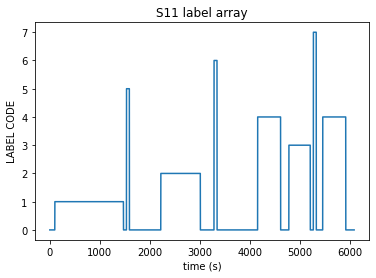



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3663100, 3) at 700 Hz for a total of  5233.0 seconds
ECG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EMG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EDA array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Temp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Resp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds


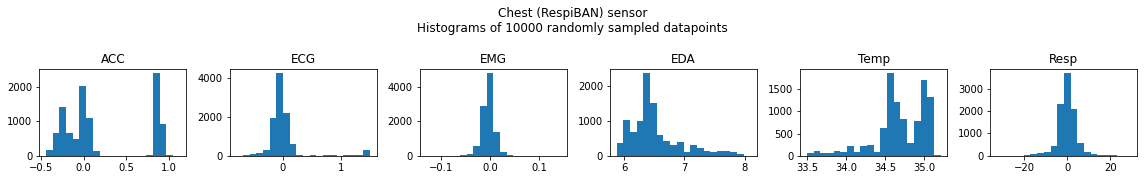


 Wrist (Empatica E4) sensor
ACC array has shape: (167456, 3) at 32 Hz for a total of  5233.0 seconds
BVP array has shape: (334912, 1) at 64 Hz for a total of  5233.0 seconds
EDA array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds
TEMP array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds


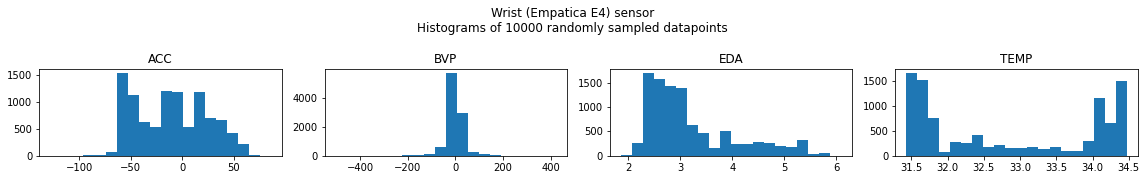


----------------------------------------------------------------------------

Elapsed time: 6.903120279312134


In [5]:
t0 = time()
S_signal = check_pkl_raw('S11', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [6]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 7.604508399963379


In [7]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3663100,)
ECG_x.shape (3663100,)
rpeaks.shape (7862,)
rpeaks_t.shape (7862,)
IBI_y.shape (7861,)
IBI_x.shape (7861,)
262 segments


In [8]:
e_frac_list[185:195]

array([0.71030534, 0.71412214, 0.71793893, 0.72175573, 0.72557252,
       0.72938931, 0.73320611, 0.7370229 , 0.74083969, 0.74465649])

In [9]:
# GUI to manually fix any mistakes made by the hamilton_segmenter 
seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

# Callback function to respond to GUI commands and to hold memory in the form of attributes (.IBI_x, .IBI_y, .seg_num)
def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

# Callback Functions to handle Next and Prev buttons
def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
# Callback Functions to handle Next and Prev buttons
def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

# Memory is in brush_update_IBI attributes:
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num

# Manage interface widgets:
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (34,)
ECG truncated shape: (15379,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [10]:
brush_update_IBI.seg_num

0

In [11]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

7861 7861
7861 7861


In [12]:
print(rpeaks[1:6]/700)
print(brush_update_IBI.IBI_x[:5])

[1.02857143 1.66142857 2.29857143 2.96142857 3.63285714]
[1.02857171 1.66142902 2.29857206 2.96142938 3.63285813]


In [13]:
if True: #
#if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S11_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S11_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [14]:
S_IBI_x = S11_IBI_x
S_IBI_y = S11_IBI_y
S11_IBI_df = pd.DataFrame(dict(S11_time=S_IBI_x, S11_IBI=S_IBI_y))
S11_IBI_df.head()

,S11_time,S11_IBI
0,1.028572,0.622857
1,1.661429,0.632857
2,2.298572,0.637143
3,2.961429,0.662857
4,3.632858,0.671429


In [15]:
#S11_IBI_df.to_csv('S11_IBI_df.csv')

In [16]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI11_suspicious_mask_post_processed = determine_suspicious_IBIs(S_IBI_x*700)

Out of 7860 total IBIs, 2 are suspicious. 
0.03 percent are suspicious


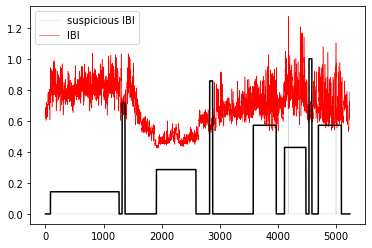

In [17]:
plt.plot(S_IBI_x[1:], IBI11_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S_IBI_x, S_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

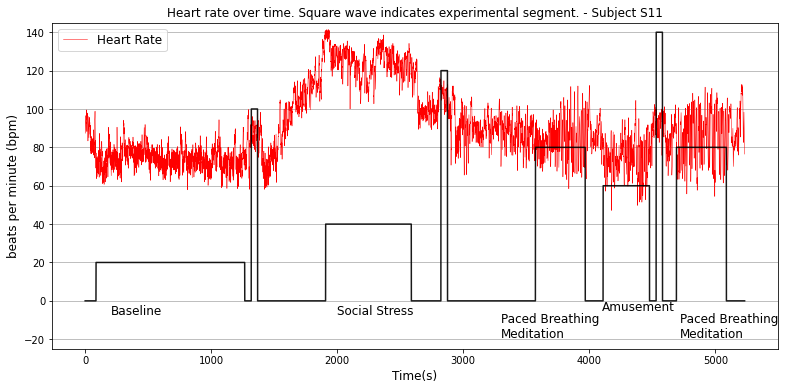

In [25]:
#plt.plot(S_IBI_x[1:], IBI11_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
HRfig = plt.figure(figsize=[13,6])
plt.plot(S_IBI_x, 60/S_IBI_y, color='r', lw=0.5, label='Heart Rate')
plt.plot(ECG_x, S_signal['label']*20, color='k',alpha=0.9)
plt.title('Heart rate over time. Square wave indicates experimental segment. - Subject S11', fontsize='large')
plt.ylabel('beats per minute (bpm)', fontsize='large')
plt.xlabel('Time(s)', fontsize='large')
plt.grid('major', axis='y')
plt.legend(loc='upper left', fontsize='large')
plt.ylim(-25, 145)
plt.annotate('Social Stress', xy=(2000, -7), fontsize='large')
plt.annotate('Paced Breathing\nMeditation', xy=(3300,-19), fontsize='large')
plt.annotate('Paced Breathing\nMeditation', xy=(4720, -19), fontsize='large')
plt.annotate('Baseline', xy=(200, -7), fontsize='large')
plt.annotate('Amusement', xy=(4100, -5), fontsize='large')
plt.show()